Let's explore.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
 

In [2]:
data = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\Indians Suicide Report Exploratory Data Analysis\Suicides in India 2001-2012.csv",sep=",", date_parser= 'Year')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [3]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
data = data[data['Total'] != 0][data['State'] != 'Total (All India)'][data['State'] != 'Total (States)'][data['State'] != 'Total (Uts)'] 

Ignored data where 0 suicides occured.

In [5]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


In [6]:
pd.crosstab(index=data.Gender, columns =data.Age_group)

Age_group,0-100+,0-14,15-29,30-44,45-59,60+
Gender,,,,,,
Female,4367,4964,12083,10941,8357,5557
Male,4584,4675,12877,13123,11373,8209


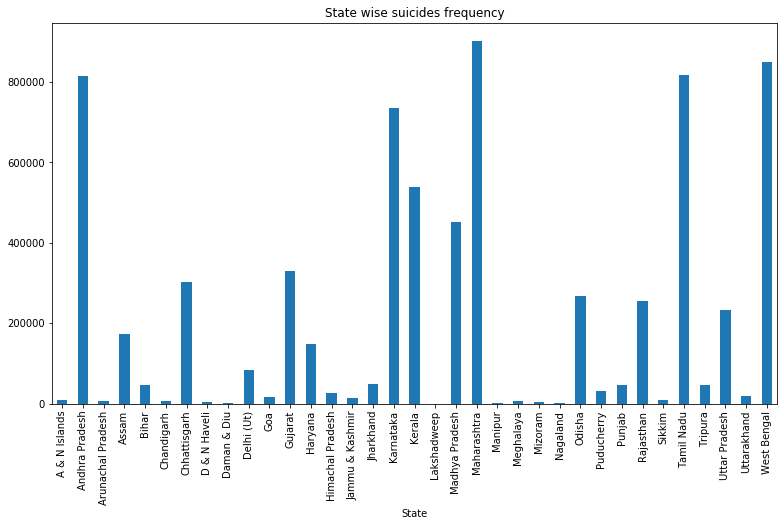

In [7]:
data.groupby('State').sum()['Total'].plot("bar",figsize=(13,7),title ="State wise suicides frequency");

Maximum no. of suicide cases are from Maharashtra, West Bengal, Andhra Pradesh.

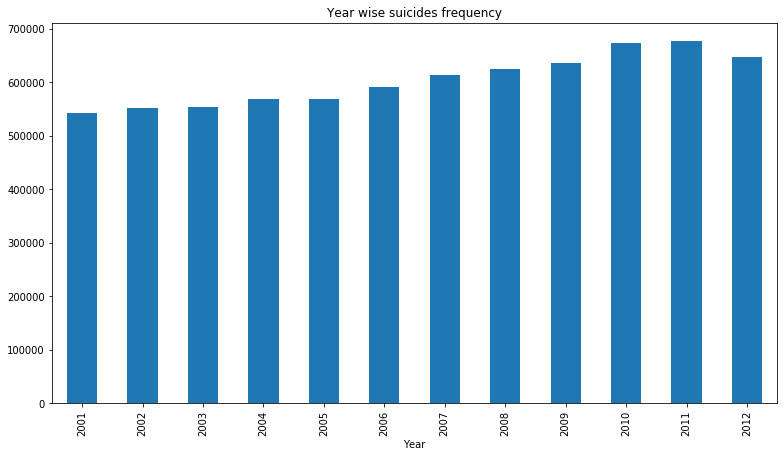

In [8]:
data.groupby('Year').sum()['Total'].plot("bar",figsize=(13,7),title ="Year wise suicides frequency");

Suicides continuosly increased.

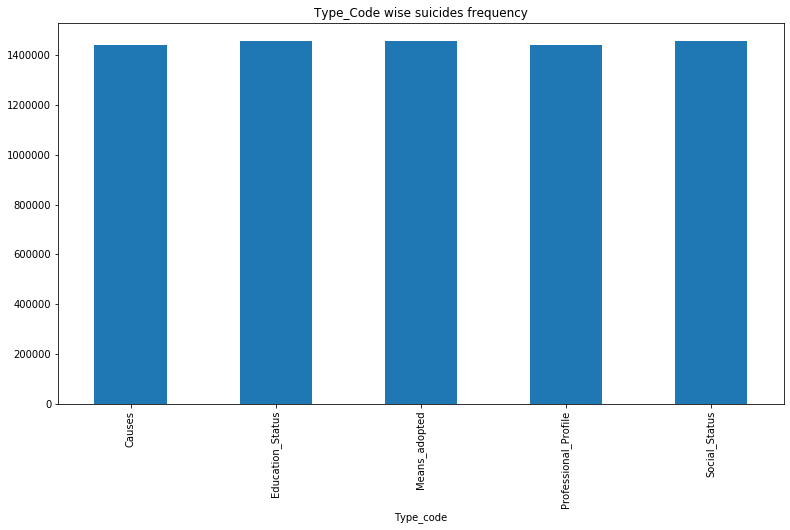

In [9]:
data.groupby('Type_code').sum()['Total'].plot("bar",figsize=(13,7),title ="Type_Code wise suicides frequency");

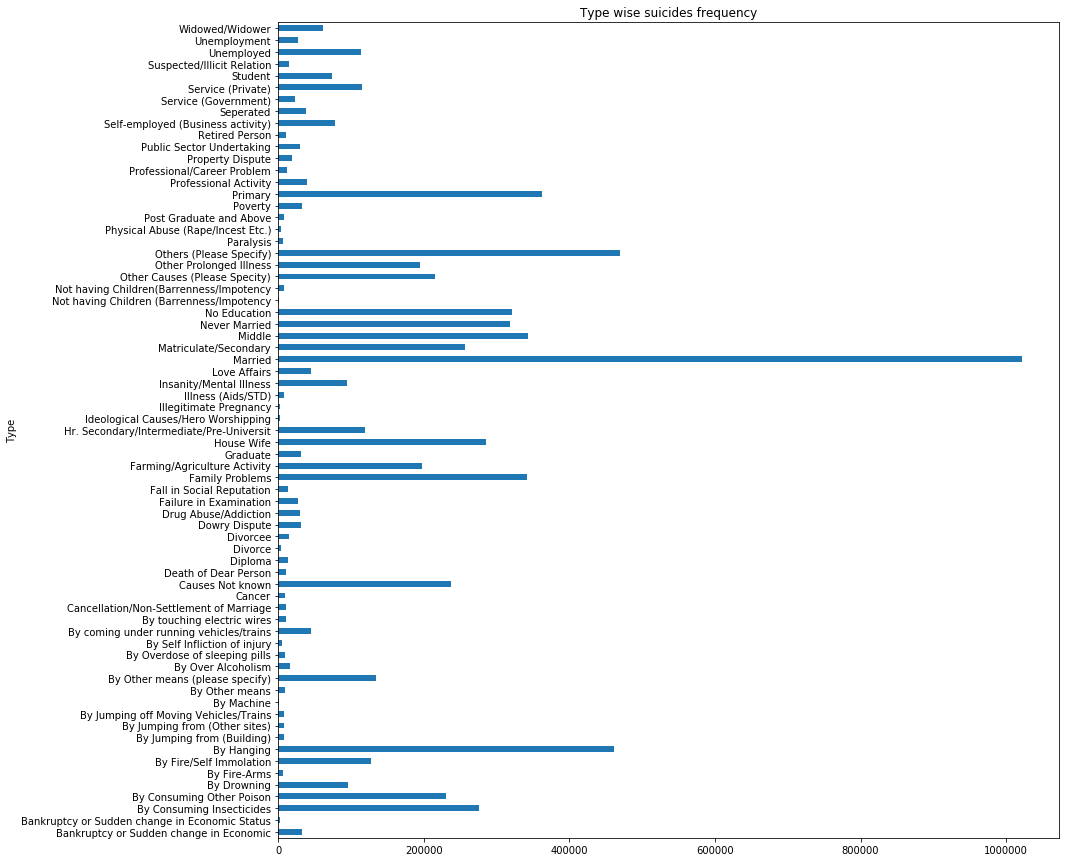

In [10]:
data.groupby('Type').sum()['Total'].plot("barh",figsize=(14,15),title ="Type wise suicides frequency");

Married Type is reason for maximum number of suicides.

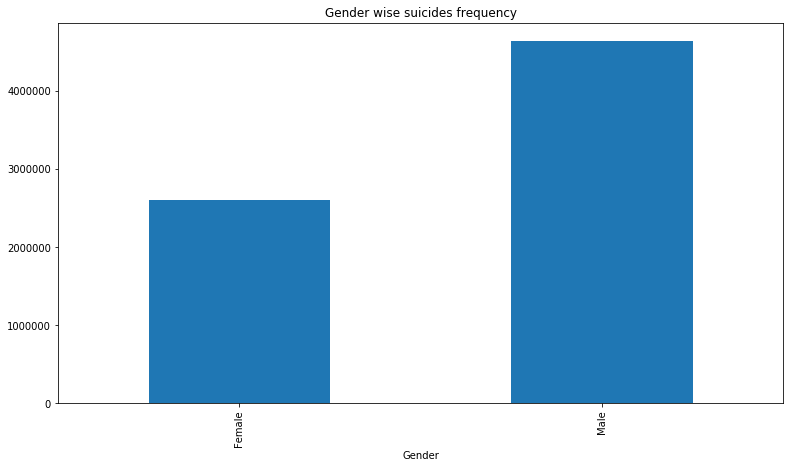

In [11]:
data.groupby('Gender').sum()['Total'].plot("bar",figsize=(13,7),title ="Gender wise suicides frequency");

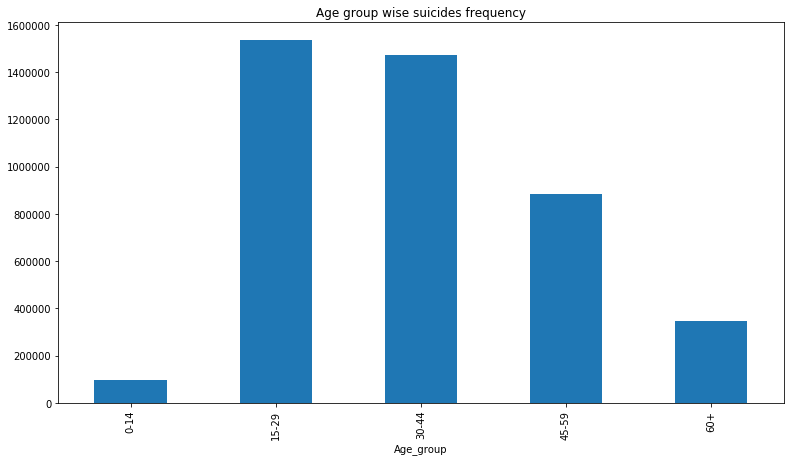

In [12]:
data[data['Age_group'] != '0-100+'].groupby('Age_group').sum()['Total'].plot("bar",figsize=(13,7),title ="Age group wise suicides frequency");

Age group of 15-29 comparatively do more suicides 

In [13]:
pd.crosstab(index=data["Age_group"],  columns=[data["Type_code"],
                                      data["Gender"]],
                             margins=True)

Type_code Causes        Education_Status       Means_adopted         \
Gender    Female   Male           Female  Male        Female   Male   
Age_group                                                             
0-100+         0      0             2705  2897             0      0   
0-14        2026   1720                0     0          1770   1848   
15-29       5637   5618                0     0          3422   3965   
30-44       5071   5713                0     0          3200   4114   
45-59       3633   4737                0     0          2627   3623   
60+         2171   3205                0     0          1984   2784   
All        18538  20993             2705  2897         13003  16334   

Type_code Professional_Profile        Social_Status           All  
Gender                  Female   Male        Female  Male          
Age_group                                                          
0-100+                       0      0          1662  1687    8951  
0-14                      1168   1107             0     0    9639  
15-29                     3024   3294             0     0   24960  
30-44                     2670   3296             0     0   24064  
45-59                     2097   3013             0     0   19730  
60+                       1402   2220             0     0   13766  
All                      10361  12930          1662  1687  101110

Text(0, 0.5, 'Suicide')

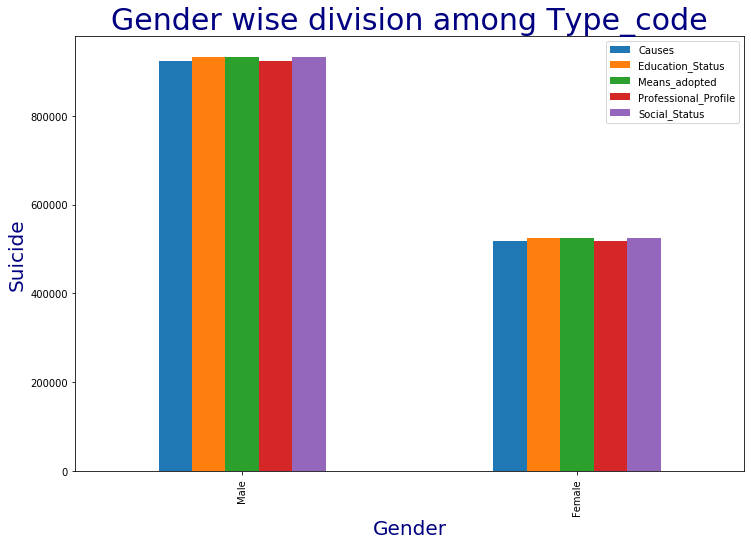

In [14]:
l = []
for v in ['Male','Female']:
    d= data[data['Gender']==v].groupby('Type_code').sum()
    w = np.array(d['Total'].values)
    l.append(w)

df2 = pd.DataFrame(l, index=['Male','Female'])

df2.plot.bar(figsize=(12,8))
plt.title("Gender wise division among Type_code",fontsize=30,color='navy')
plt.legend(d.index)
plt.xlabel("Gender",fontsize=20,color='navy')
plt.ylabel("Suicide",fontsize=20,color='navy')

A & N Islands Type_code
Causes                  497
Education_Status        129
Means_adopted           274
Professional_Profile    343
Social_Status            56
dtype: int64
Andhra Pradesh Type_code
Causes                  2247
Education_Status         192
Means_adopted           1523
Professional_Profile    1103
Social_Status            120
dtype: int64
Arunachal Pradesh Type_code
Causes                  274
Education_Status        123
Means_adopted           261
Professional_Profile    345
Social_Status            59
dtype: int64
Assam Type_code
Causes                  1588
Education_Status         179
Means_adopted           1119
Professional_Profile     862
Social_Status            120
dtype: int64
Bihar Type_code
Causes                  1128
Education_Status         177
Means_adopted            991
Professional_Profile     707
Social_Status            116
dtype: int64
Chandigarh Type_code
Causes                  340
Education_Status        147
Means_adopted           271
Profes

Text(0, 0.5, 'Suicides Count')

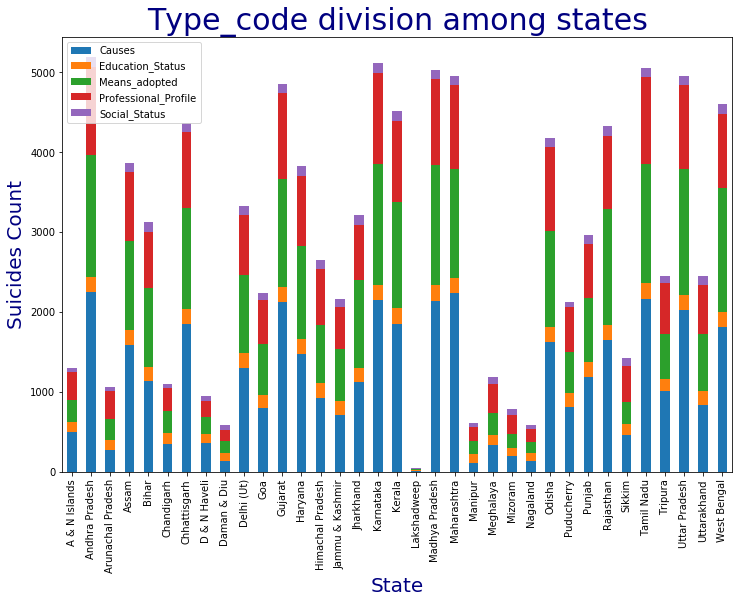

In [ ]:
l = []
s = data.groupby('State').size().index
for v in s:
    d= data[data['State']==v].groupby('Type_code').size()
    w = np.array(d.values)
    print(v,d)
    l.append(w)
    
df2 = pd.DataFrame(l, index=s)
df2.plot.bar(figsize=(12,8),stacked =True)
plt.title("Type_code division among states",fontsize=30,color='navy')
plt.legend(d.index)
plt.xlabel("State",fontsize=20,color='navy')
plt.ylabel("Suicides Count",fontsize=20,color='navy')

In [ ]:
l = []
s = data.groupby('State').size().index
for v in s:
    d= data[data['State']==v].groupby('Age_group').sum()
    w = np.array(d['Total'].values)
    l.append(w)
    
df2 = pd.DataFrame(l, index=s)
df2.plot(kind='barh',figsize=(12,8),stacked =True)
plt.title("Age_group wise suicides among states",fontsize=30,color='navy')
plt.legend(d.index)
plt.ylabel("State",fontsize=20,color='navy')
plt.xlabel("Suicides Count",fontsize=20,color='navy')

Text(0.5, 0, 'Suicides Count')

In [ ]:
l = []
s = data.groupby('Year').size().index
for v in s:
    d= data[data['Year']==v].groupby('Type_code').size()
    w = np.array(d.values)
    l.append(w)
    
df2 = pd.DataFrame(l, index=s)
df2.plot.bar(figsize=(12,8),stacked =True)
plt.title("Type_code division among Years",fontsize=30,color='navy')
plt.legend(d.index)
plt.xlabel("State",fontsize=20,color='navy')
plt.ylabel("Suicides Count",fontsize=20,color='navy')

In [ ]:
l = []
s = data.groupby('Type').size().index
for v in s:
    d= data[data['Type']==v].groupby('Gender').sum()
    w = np.array(d['Total'].values)
    l.append(w)
%matplotlib agg    
df2 = pd.DataFrame(l, index=s)
df2.plot(kind='barh',figsize=(15,20))
plt.title("Type division among gender",fontsize=30,color='navy')
plt.legend(d.index)
plt.ylabel("Causes",fontsize=20,color='navy')
plt.xlabel("Suicides Count",fontsize=20,color='navy')

Males are dominating in doing suicides in among 38 Type except few where females are dominating they are :

 1. Divorce
 2. Dispute
 3. House Wife
 4. Illegitimate Pregnancy
 5. Barreness
 6. Widower

In [ ]:
l = []
s = data.groupby('Year').size().index
for v in s:
    d= data[data['Year']==v].groupby('Type_code').sum()
    w = np.array(d['Total'].values)
    l.append(w)
    
df2 = pd.DataFrame(l/l[0], index=s)
df2.plot.bar(figsize=(12,8),stacked =False)
plt.title("Type_code vs Year",fontsize=30,color='navy')
plt.legend(d.index)
plt.xlabel("Year",fontsize=20,color='navy')
plt.ylabel("Suicides Count",fontsize=20,color='navy')

In [ ]:
l = []
s = data.groupby('Year').size().index
ds = data[data['Type_code'] == 'Education_Status']
for v in s:
    d= ds[ds['Year']==v].groupby('Type').sum()
    w = np.array(d['Total'].values)
    l.append(w)
    
df2 = pd.DataFrame(l/l[0], index=s)
df2.plot(figsize=(12,8),stacked =False)
plt.title("Type(Education_Status) vs Year",fontsize=30,color='navy')
plt.legend(d.index)
plt.xlabel("Year",fontsize=20,color='navy')
plt.ylabel("Suicides Count",fontsize=20,color='navy')

**People with no education has committed lesser suicides.**

In [ ]:
l = []
s = data.groupby('Year').size().index
ds = data[data['Type_code'] == 'Causes']
for v in s:
    d= ds[ds['Year']==v].groupby('Type').sum()
    w = np.array(d['Total'].values)
    l.append(w)
    
df2 = pd.DataFrame(l/l[0], index=s)
df2.plot(figsize=(12,8),stacked =False)
plt.title("Type(Causes) vs Year",fontsize=30,color='navy')
plt.legend(d.index)
plt.xlabel("Year",fontsize=20,color='navy')
plt.ylabel("Suicides Count",fontsize=20,color='navy')

In [ ]:
l = []
s = data.groupby('Year').size().index
ds = data[data['Type_code'] == 'Social_Status']
for v in s:
    d= ds[ds['Year']==v].groupby('Type').sum()
    w = np.array(d['Total'].values)
    #print(v,d['Total'].values)
    l.append(w)

df2 = pd.DataFrame(l/l[0], index=s)
df2.plot(figsize=(12,8),stacked =False)
plt.title("Type(Social_Status) vs Year",fontsize=30,color='navy')
plt.legend(d.index)
plt.xlabel("Year",fontsize=20,color='navy')
plt.ylabel("Suicides Count",fontsize=20,color='navy')

'Divorcee' has lesser suicide counts.  
**Vote**